In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import variance

In [44]:
data = pd.read_csv('input\Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [45]:
data = data.dropna()

In [46]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)

In [47]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [48]:
df = data.sort_values(by=["NetWorth"],ascending=False).head(11).reset_index()
df.head()


,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


<function matplotlib.pyplot.show(close=None, block=None)>

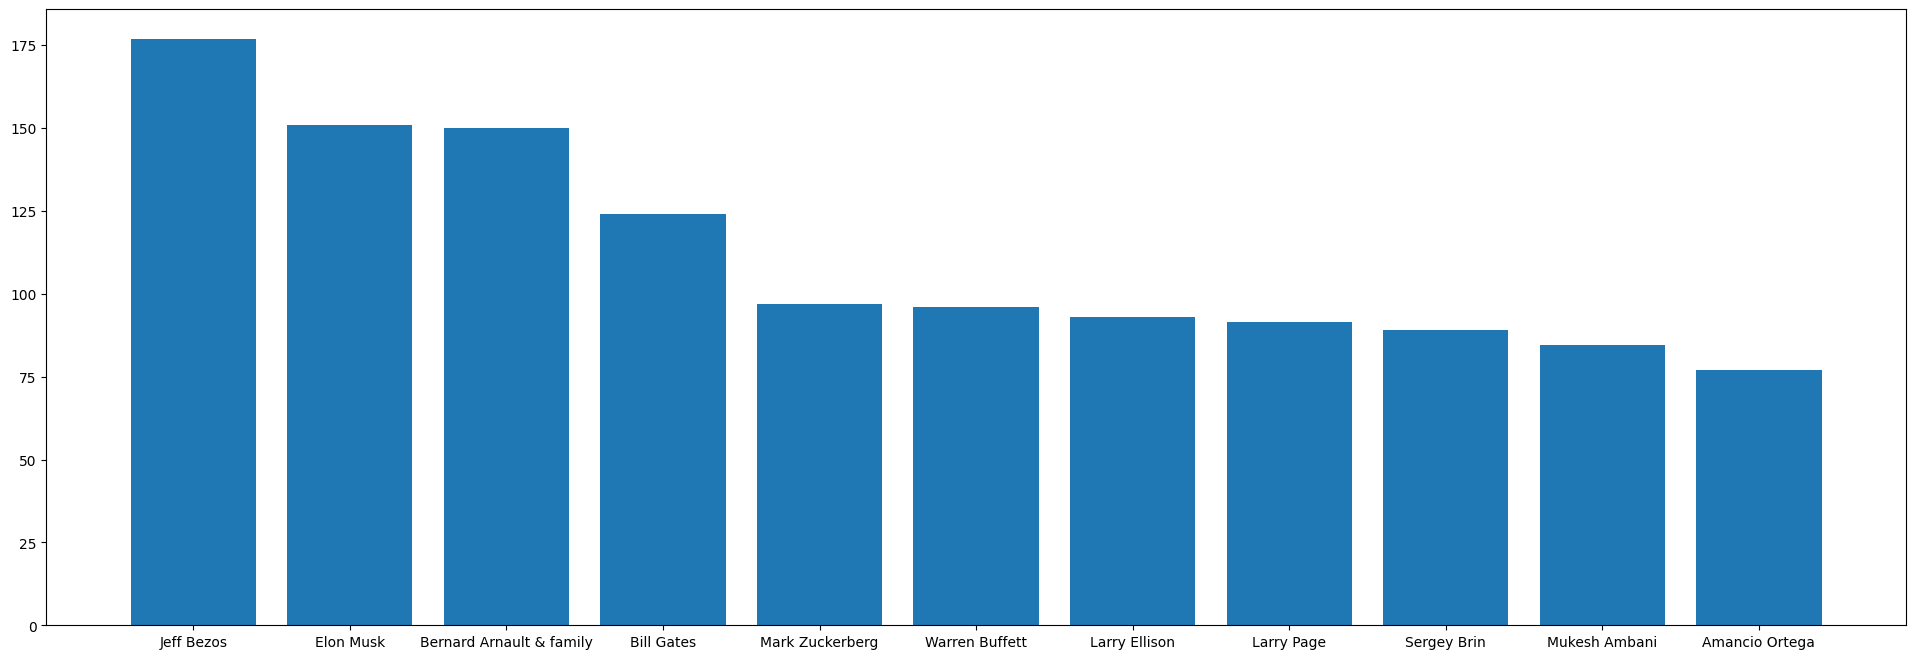

In [49]:
plt.figure(figsize=(24,8))
plt.bar(df['Name'],df['NetWorth'])
plt.show

In [50]:
df = data["Source"].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


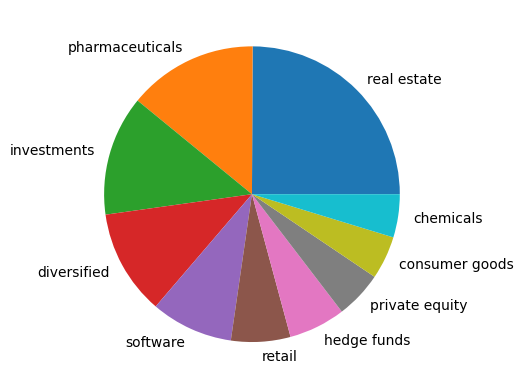

In [51]:
plt.pie(df['count'],labels=df['Source'])
plt.show()

In [52]:
df = data["Industry"].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


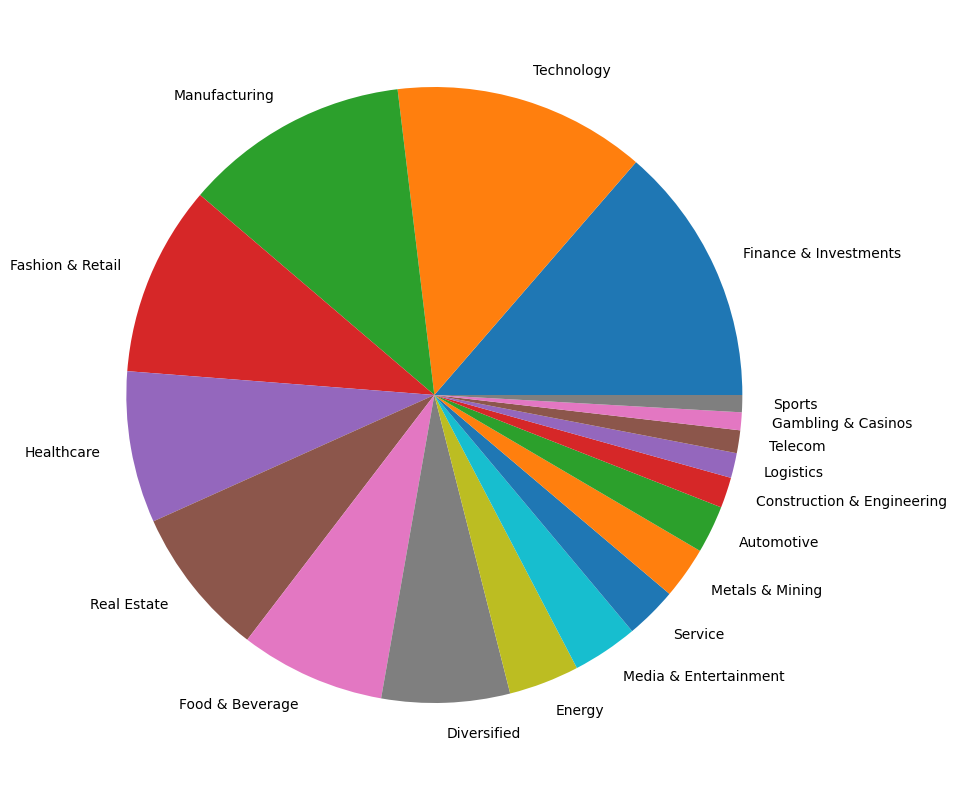

In [53]:
plt.figure(figsize=(20,10))
plt.pie(df['count'],labels=df['Industry'])
plt.show()

In [54]:
df = data['Country'].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


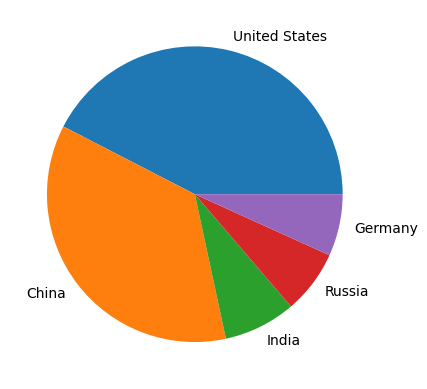

In [55]:

plt.pie(df['count'],labels=df['Country'])
plt.show()

Average and variance of ages

In [56]:
df = data['Age'].astype(int).reset_index()
df_sum = data['Age'].astype(int).sum()

avg = df_sum // int(df['Age'].count())
print(f'Average of ages: {avg}')
print(f'Variance of ages: {round(variance(df["Age"]),1)}')


Average of ages: 63
Variance of ages: 180.8


Total income of each county

In [57]:
df = data.groupby(['Country'])['NetWorth'].sum().reset_index()
df = df.sort_values(by='NetWorth',ascending=False).reset_index()
df



,index,Country,NetWorth
0,66,United States,4384.7
1,8,China,2496.1
2,50,Russia,586.0
3,18,Germany,576.6
4,24,India,567.3
...,...,...,...
65,43,Oman,2.3
66,56,St. Kitts and Nevis,1.6
67,60,Tanzania,1.6
68,69,Zimbabwe,1.5


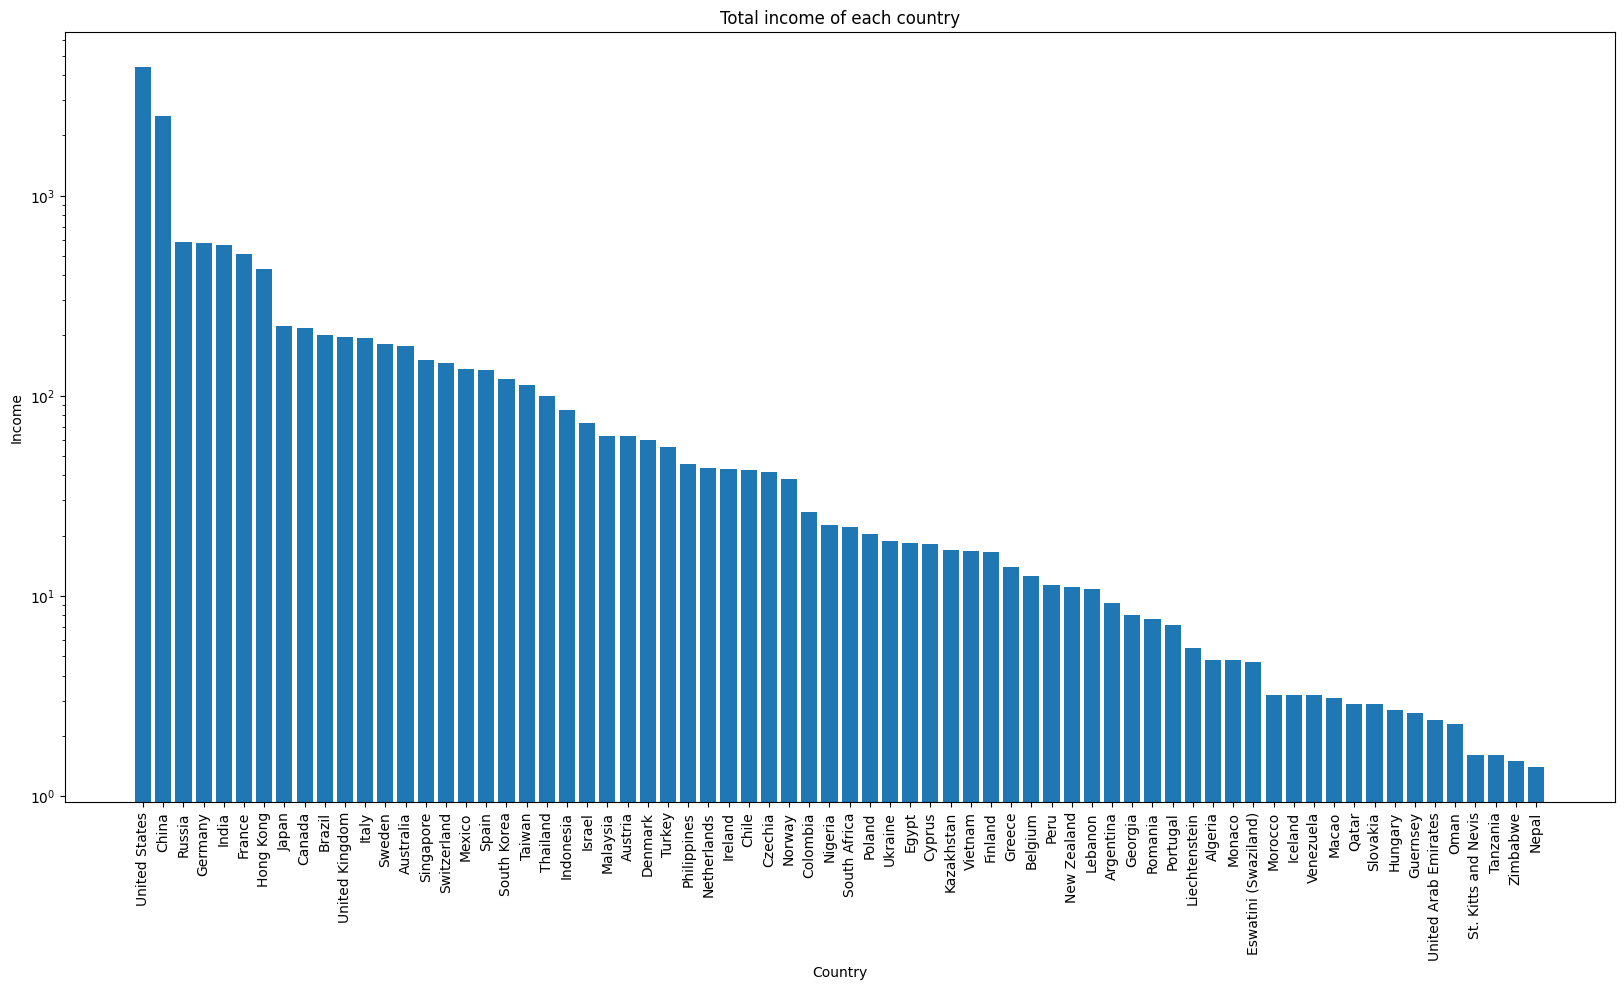

In [58]:
plt.figure(figsize=(20,10))
plt.title('Total income of each country')
plt.xlabel('Country')
plt.ylabel('Income')
plt.bar(df['Country'],df['NetWorth'])
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.savefig('output/total_income_each_country.png')
plt.show()

top 10 billionaires in USA

In [59]:
df = data.copy()
df['Name'] = df.query('Country == "United States"')['Name']
df = df.dropna().head(11).reset_index()
df.head(10)

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,7,Larry Page,91.5,United States,Google,8,48.0,Technology
7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


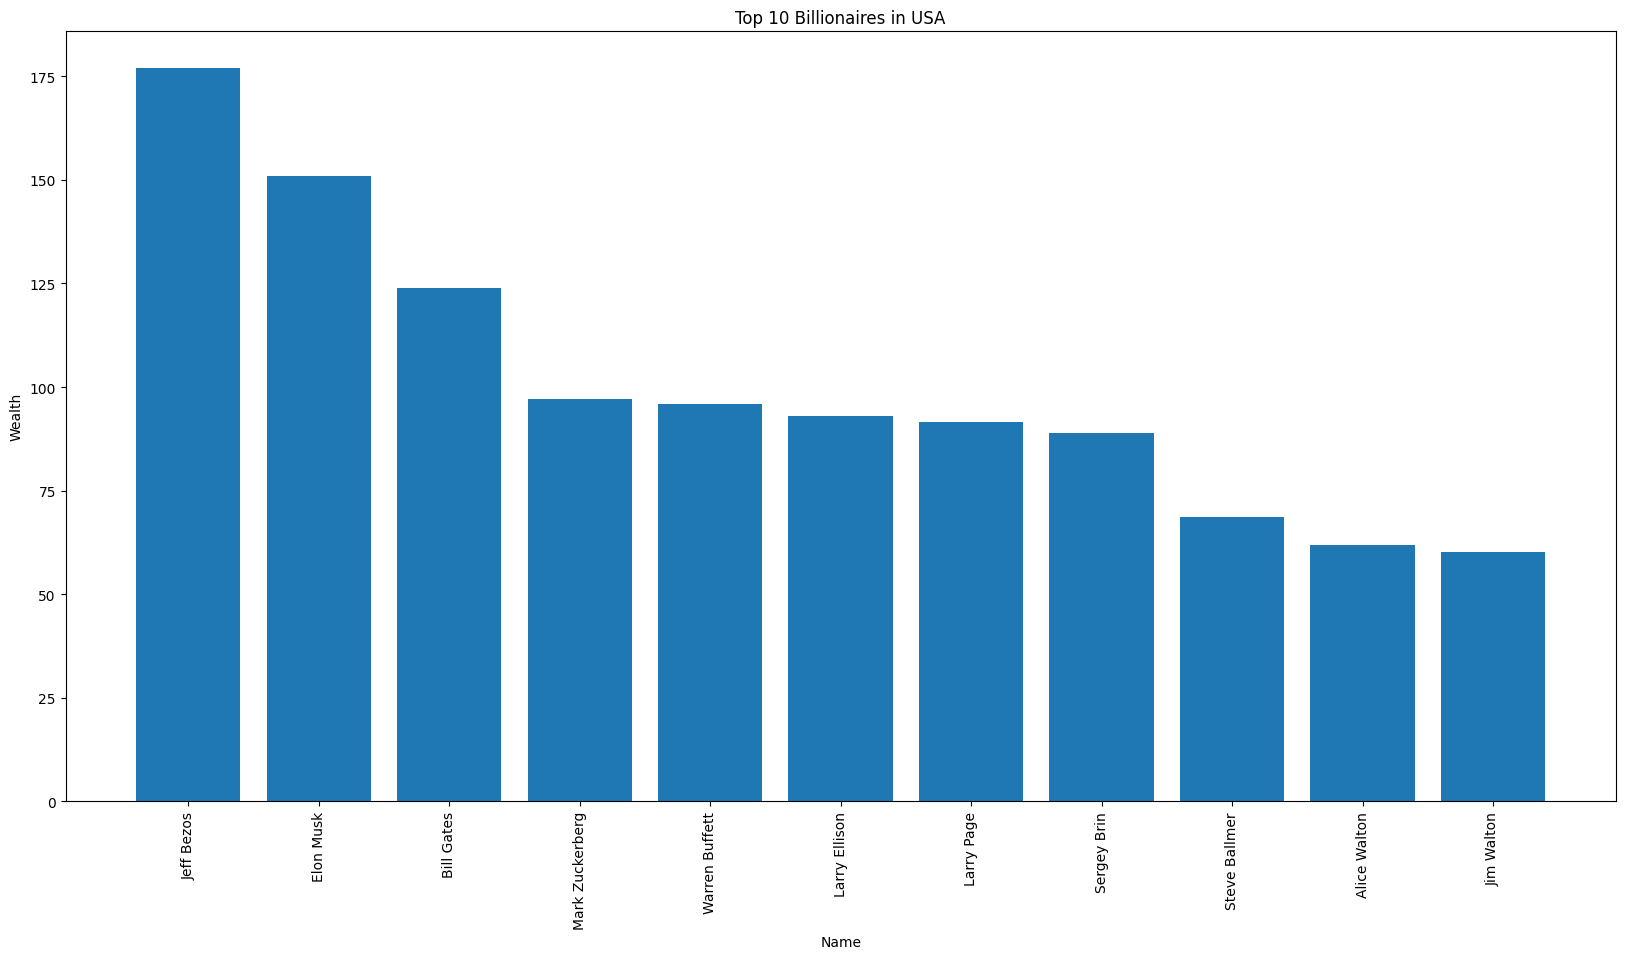

In [60]:
plt.figure(figsize=(20,10))
plt.title('Top 10 Billionaires in USA')
plt.xlabel('Name')
plt.ylabel('Wealth')
plt.bar(df['Name'],df['NetWorth'])
plt.xticks(rotation='vertical')
plt.savefig('output/top_billionaires_usa.png')
plt.show()

10 countries with the least number of Billionaires

In [61]:
df = data.groupby(['Country'])['Name'].count().reset_index()
df = df.sort_values(by='Name',ascending=True).reset_index()
df = df.head(11)
df

,index,Country,Name
0,0,Algeria,1
1,67,Venezuela,1
2,64,United Arab Emirates,1
3,60,Tanzania,1
4,56,St. Kitts and Nevis,1
5,43,Oman,1
6,38,Nepal,1
7,33,Macao,1
8,32,Liechtenstein,1
9,20,Guernsey,1


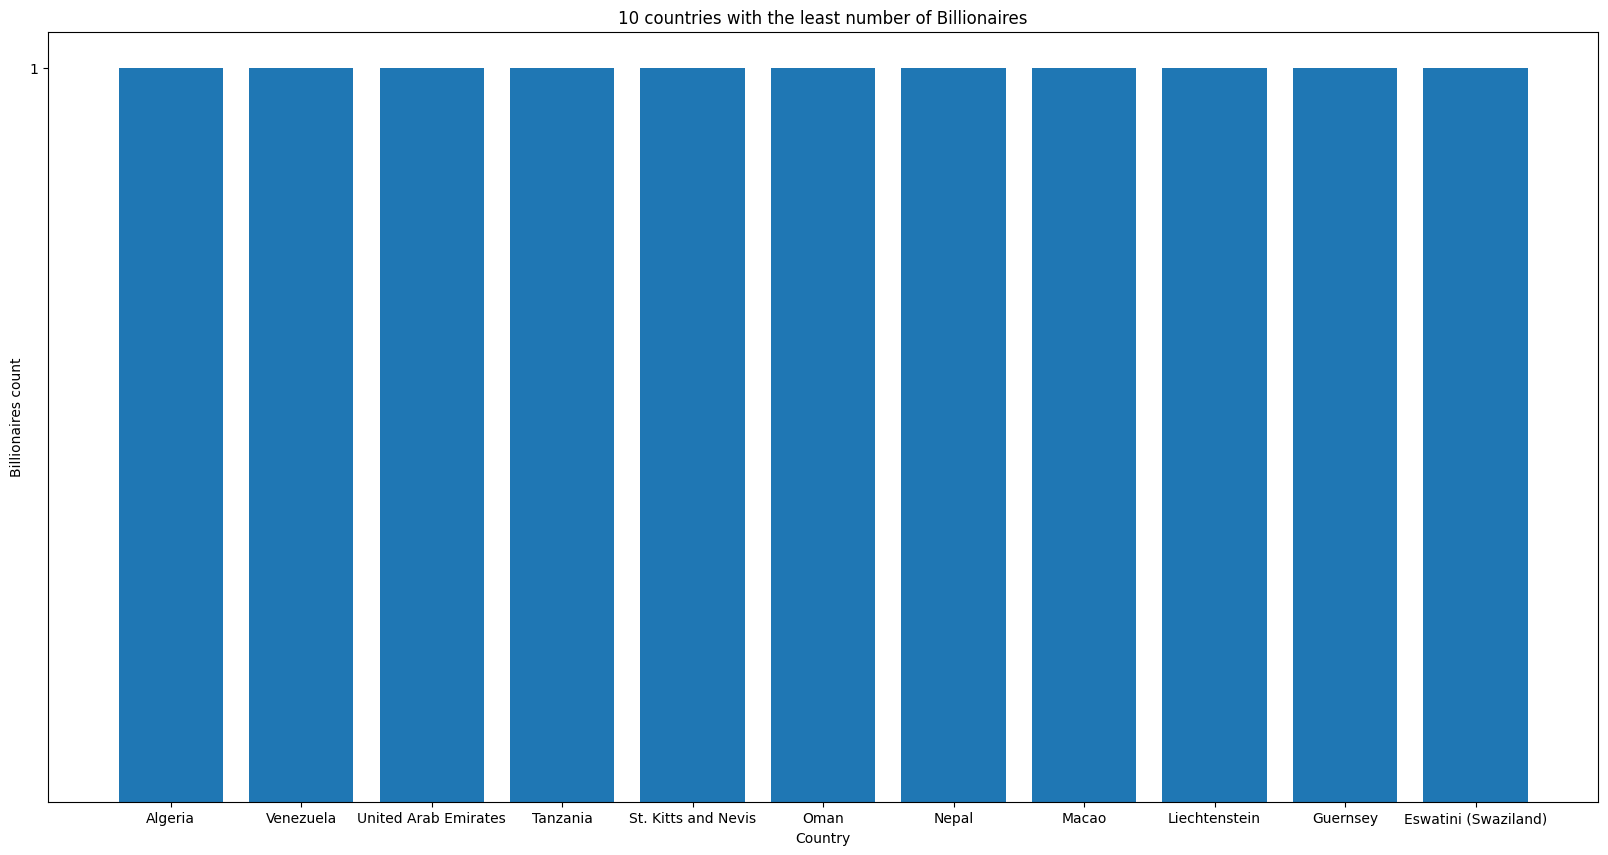

In [62]:
plt.figure(figsize=(20,10))
plt.title('10 countries with the least number of Billionaires')
plt.xlabel('Country')
plt.ylabel('Billionaires count')
plt.bar(df['Country'],df['Name'])
plt.yticks(range(min(df['Name']),max(df['Name'])+1))
plt.savefig('output/countries_least_billionaires.png')
plt.show()